Shape of dataset: (7043, 21)

Data types and non-null counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13248\2677526177.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


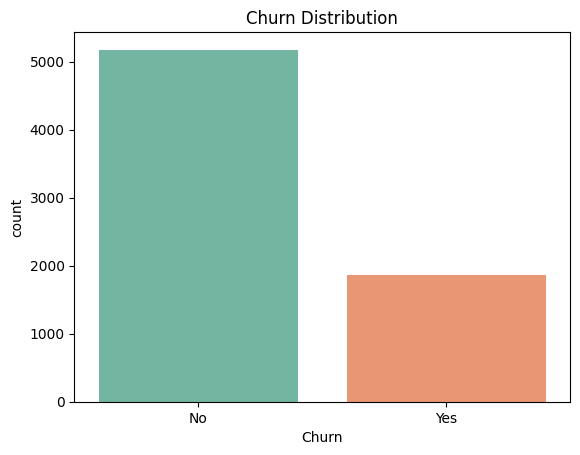

Churn Distribution (%):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


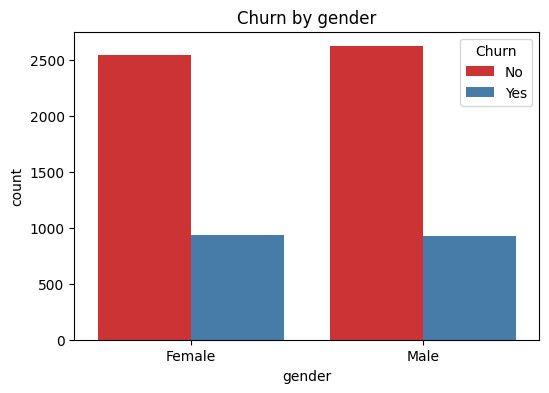

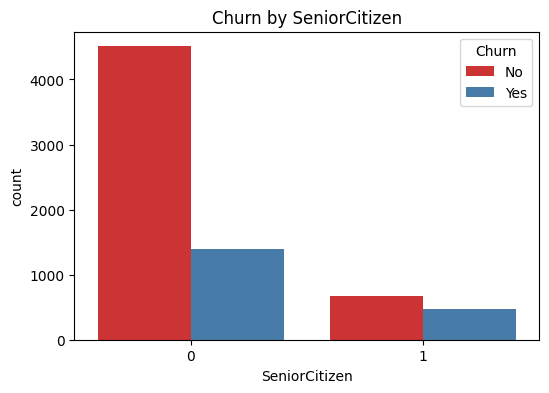

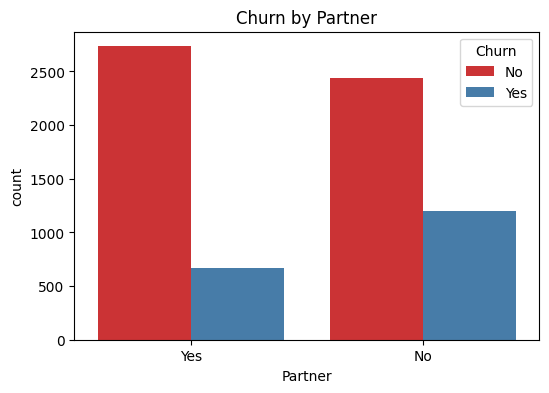

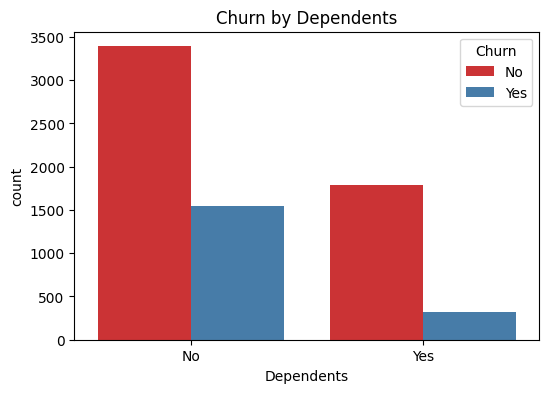

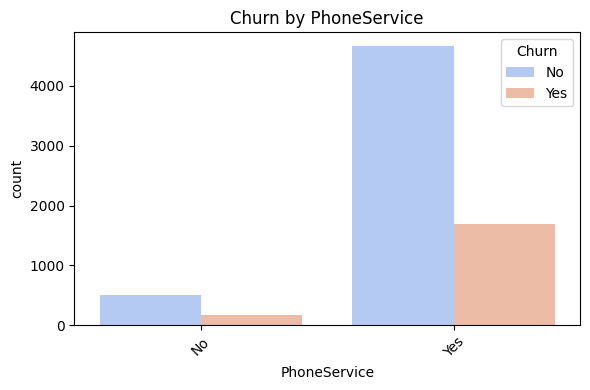

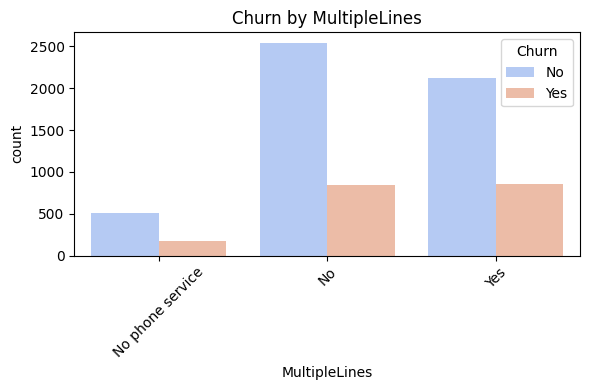

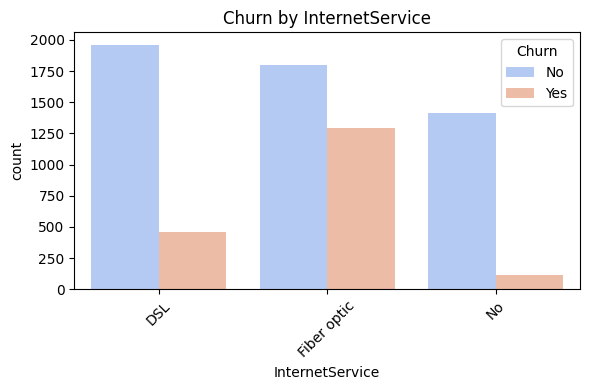

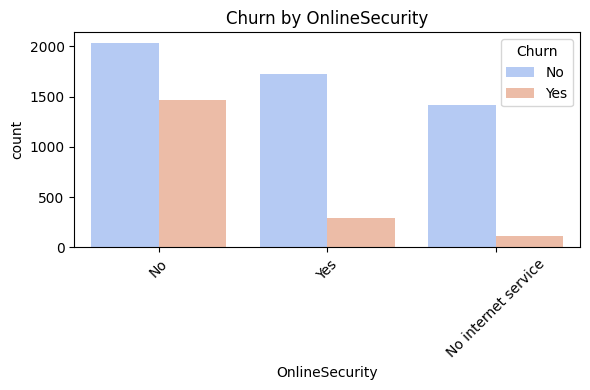

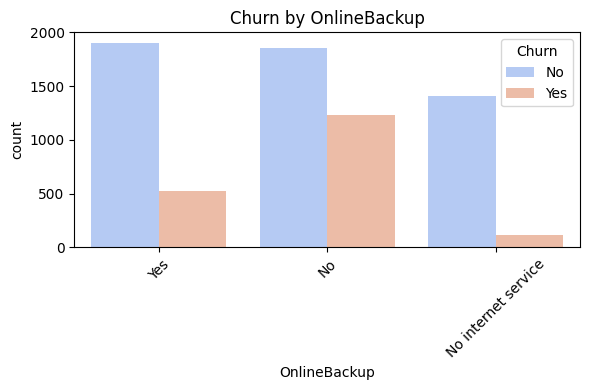

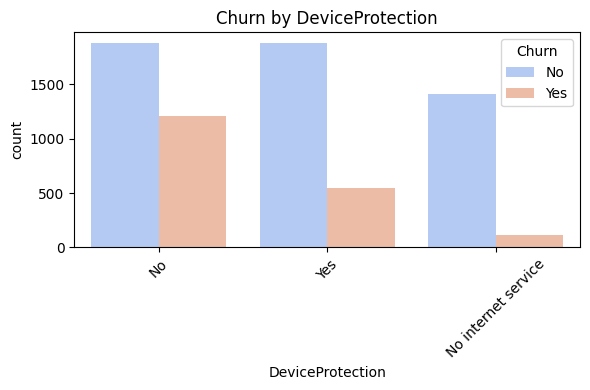

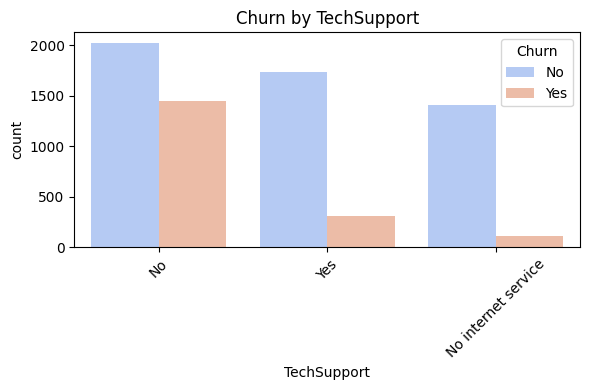

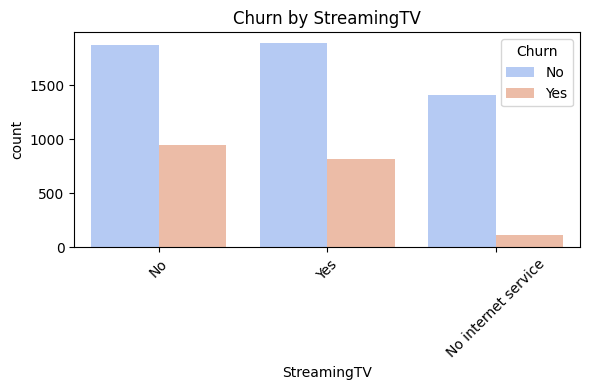

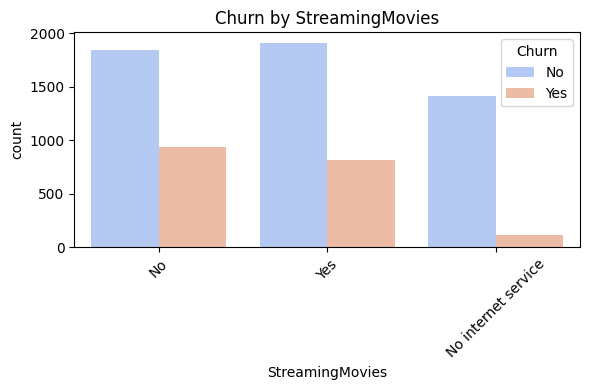

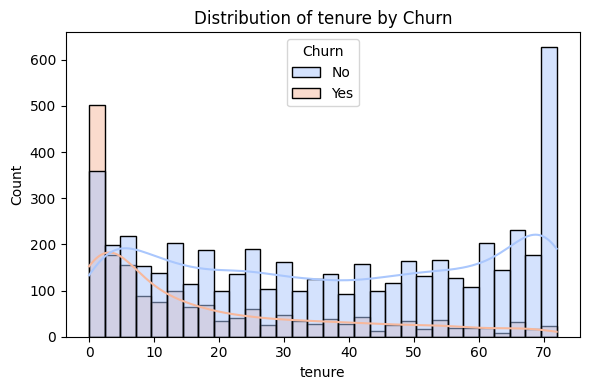

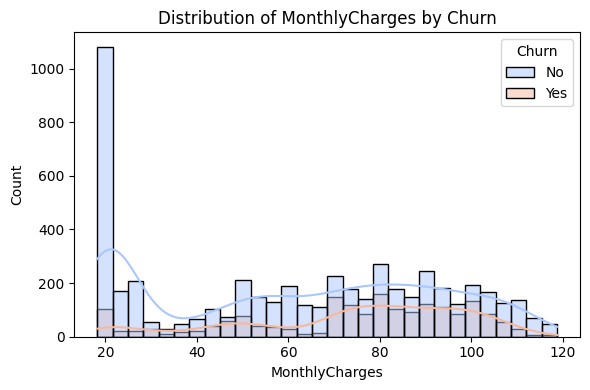

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13248\2677526177.py:61: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


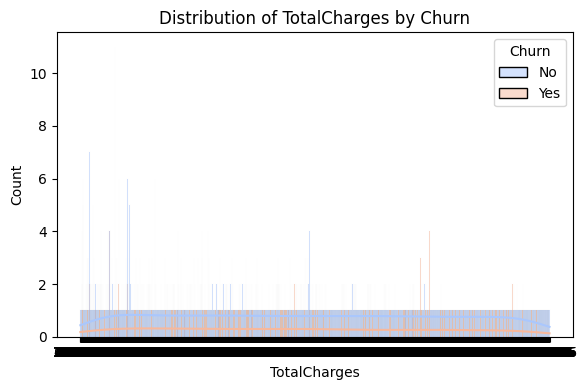

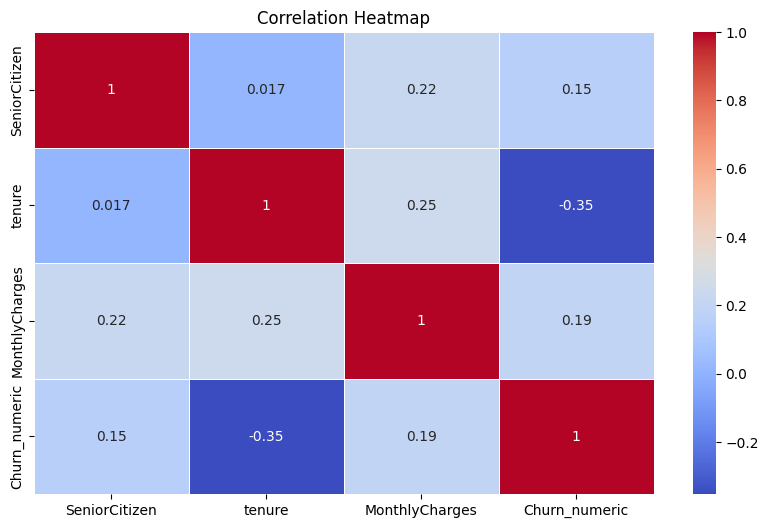

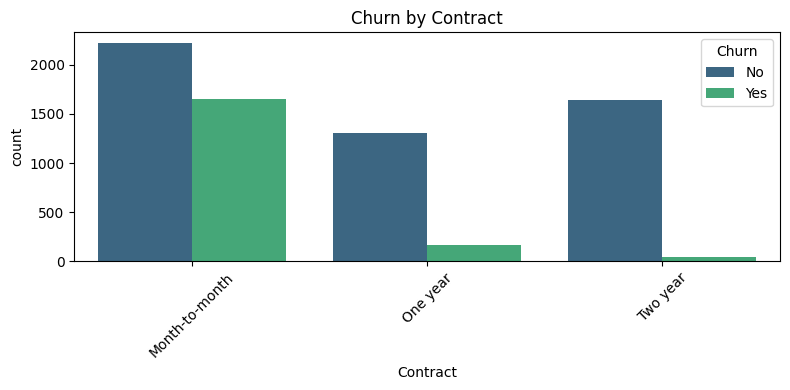

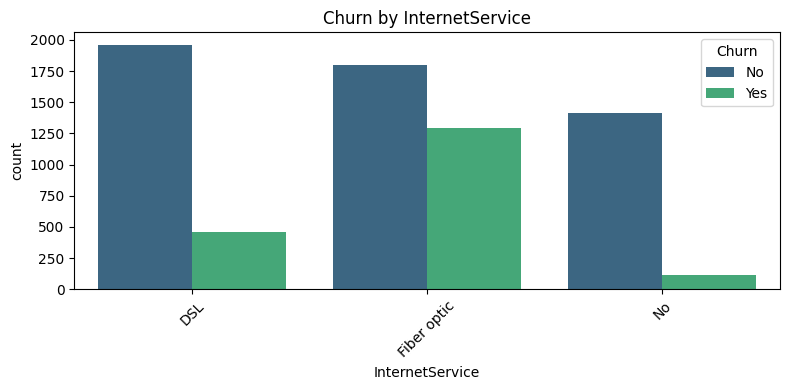

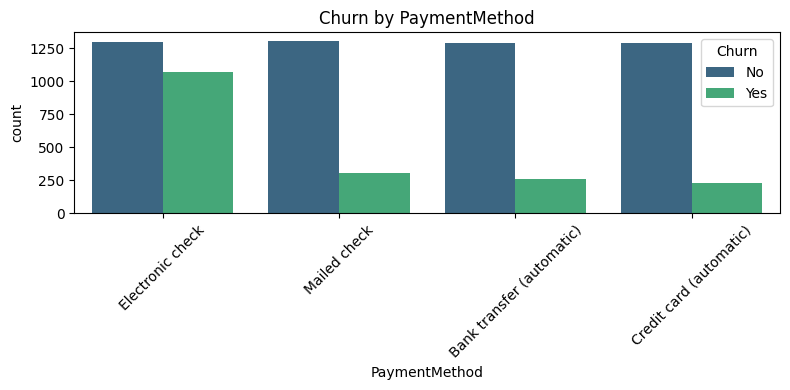

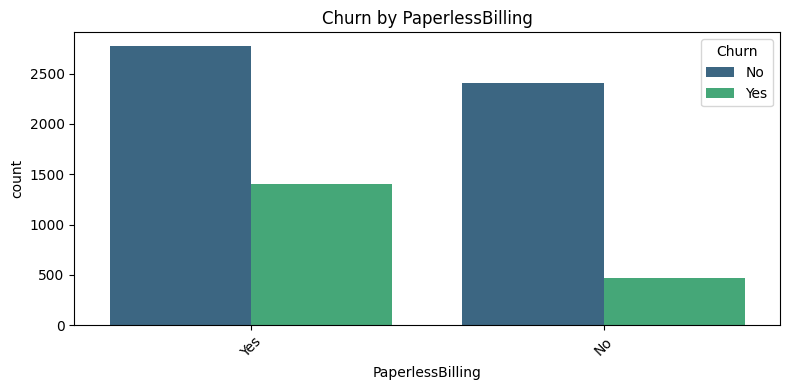


Contract vs Churn:
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858

InternetService vs Churn:
Churn                   No        Yes
InternetService                      
DSL              81.040892  18.959108
Fiber optic      58.107235  41.892765
No               92.595020   7.404980

PaymentMethod vs Churn:
Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700

PaperlessBilling vs Churn:
Churn                    No        Yes
PaperlessBilling                      
No                83.669916  16.330084
Yes               66.434908  33.565092


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13248\2677526177.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='coolwarm')


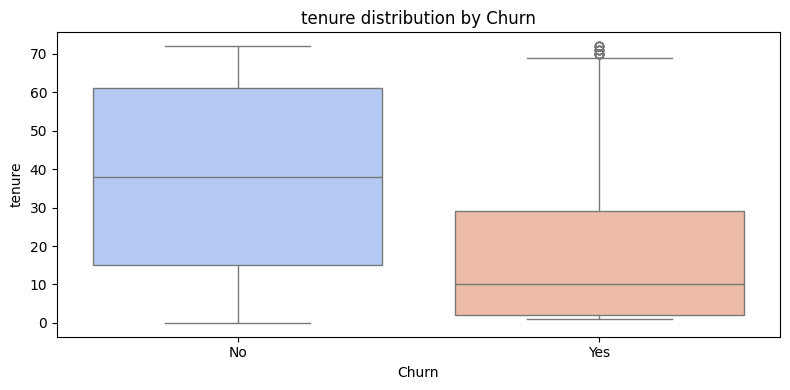

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13248\2677526177.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='coolwarm')


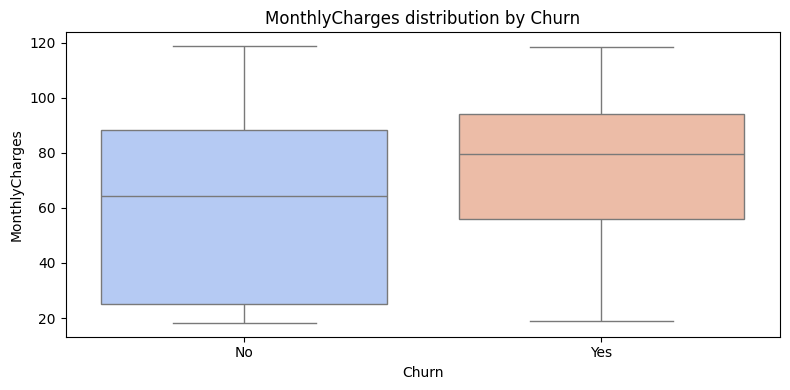

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13248\2677526177.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='coolwarm')


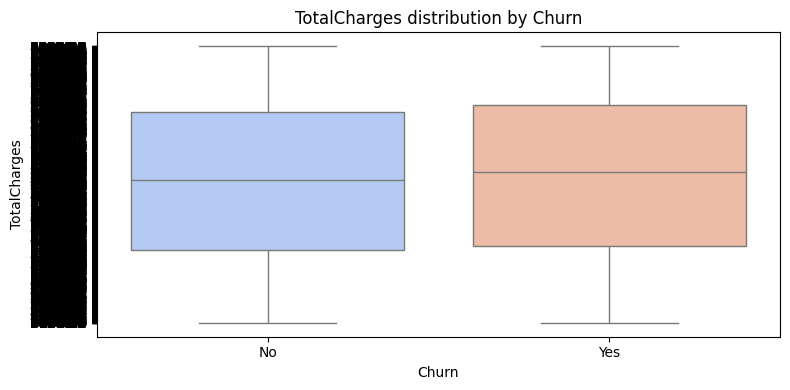

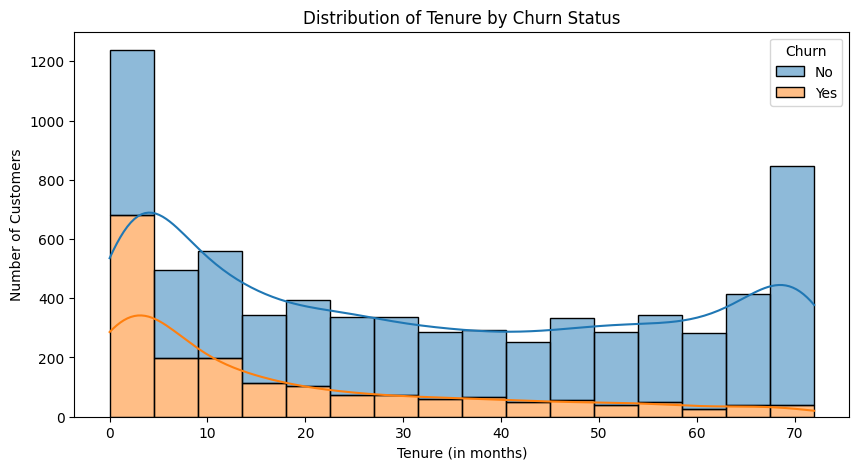

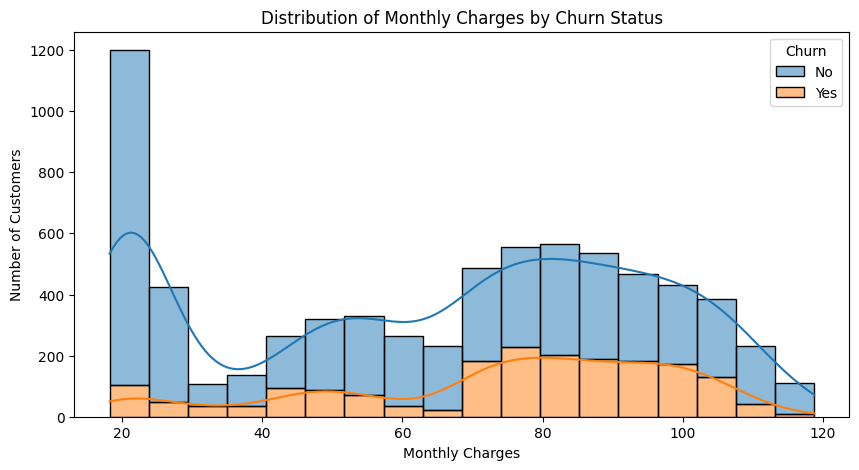

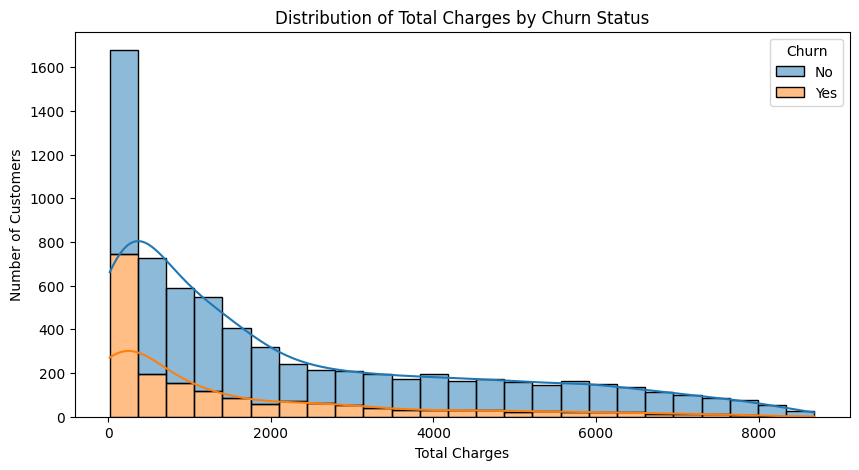

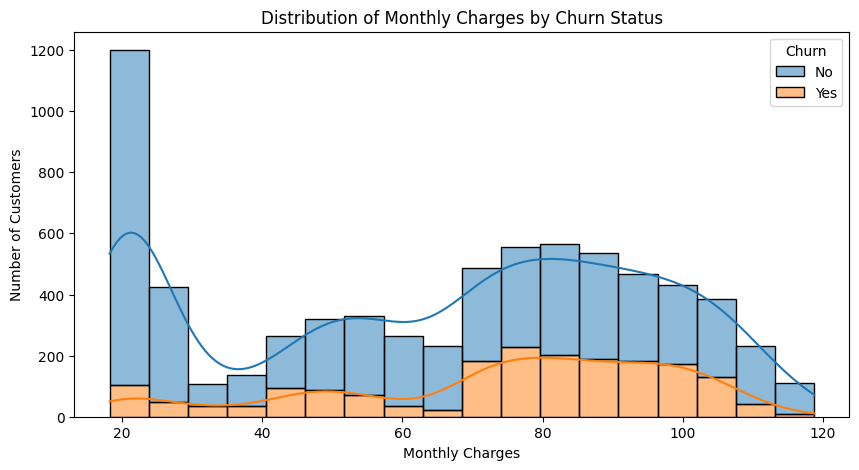

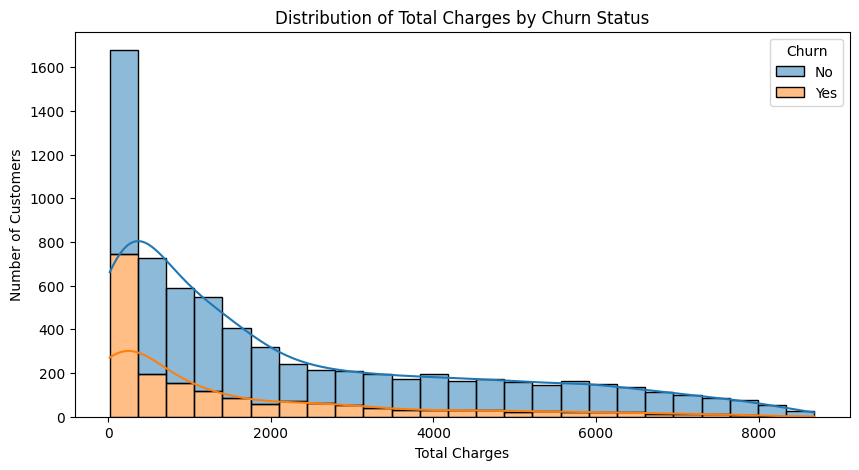

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '../data/New-Telco-Customer-Churn.csv'  # Path to your data file
df = pd.read_csv(file_path)


# Basic info
print("Shape of dataset:", df.shape)
print("\nData types and non-null counts:\n")
print(df.info())
print("\nFirst 5 rows of data:\n")
print(df.head())

df.info()

# Descriptive stats for numerical features
df.describe()

# Check missing values
df.isnull().sum()

# Target variable countplot
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Churn Distribution')
plt.show()

# Optional: Percentage churned
churn_percent = df['Churn'].value_counts(normalize=True) * 100
print("Churn Distribution (%):")
print(churn_percent)

cols_to_check = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for col in cols_to_check:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Churn', palette='Set1')
    plt.title(f'Churn by {col}')
    plt.show()

service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in service_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Churn', palette='coolwarm')
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette='coolwarm', bins=30)
    plt.title(f'Distribution of {col} by Churn')
    plt.tight_layout()
    plt.show()

df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Select only numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

cat_cols = ['Contract', 'InternetService', 'PaymentMethod', 'PaperlessBilling']

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Churn', palette='viridis')
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

for col in cat_cols:
    print(f"\n{col} vs Churn:")
    print(pd.crosstab(df[col], df['Churn'], normalize='index') * 100)

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Churn', y=col, palette='coolwarm')
    plt.title(f'{col} distribution by Churn')
    plt.tight_layout()
    plt.show()

    # Convert to numeric and handle errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing TotalCharges with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True)
plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Tenure (in months)')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True)
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='TotalCharges', hue='Churn', multiple='stack', kde=True)
plt.title('Distribution of Total Charges by Churn Status')
plt.xlabel('Total Charges')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True)
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='TotalCharges', hue='Churn', multiple='stack', kde=True)
plt.title('Distribution of Total Charges by Churn Status')
plt.xlabel('Total Charges')
plt.ylabel('Number of Customers')
plt.show()
